In [3]:
import sys
import os

# Dynamically add the pykan package directory to the Python path
package_path = os.path.join(os.path.dirname(os.getcwd()), 'pykan')
sys.path.append(package_path)

In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import torch
import numpy as np

In [5]:
winddata_path = os.path.join('..\\Liao_code','Task15_W_Zone6.csv')
data = pd.read_csv(winddata_path)
Y = data.iloc[:, 2].values.astype(np.float64)  
X = data.iloc[:, 3:7].values.astype(np.float64)


scaler = MinMaxScaler()
X= scaler.fit_transform(X)
split1 = int(0.1 * len(X))
split2 = int(0.9 * len(X))

X_train, y_train = X[:split1], Y[:split1]
X_val, y_val = X[split1:split2], Y[split1:split2]
X_test, y_test = X[split2:], Y[split2:]

ndarray_data = [X_train, y_train, X_val, y_val, X_test, y_test]
tensor_data_list = [torch.from_numpy(x) for x in ndarray_data]

#tensor_data_list[3:6] = [x.unsqueeze(1) for x in tensor_data_list[3:6]]
tensor_data_list[1] = tensor_data_list[1].unsqueeze(1)  # y_train
tensor_data_list[3] = tensor_data_list[3].unsqueeze(1)  # y_val
tensor_data_list[5] = tensor_data_list[5].unsqueeze(1)  # y_test

dataset = {'train_input': tensor_data_list[0], 
            'test_input': tensor_data_list[4], 
            'train_label': tensor_data_list[1], 
            'test_label': tensor_data_list[5]}

dataset['train_input'].shape, dataset['train_label'].shape


(torch.Size([1680, 4]), torch.Size([1680, 1]))

In [6]:
from kan import *
torch.set_default_dtype(torch.float64)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[4,8,4,1], grid=3, k=3, seed=42, device=device)

cpu
checkpoint directory created: ./model
saving model version 0.0


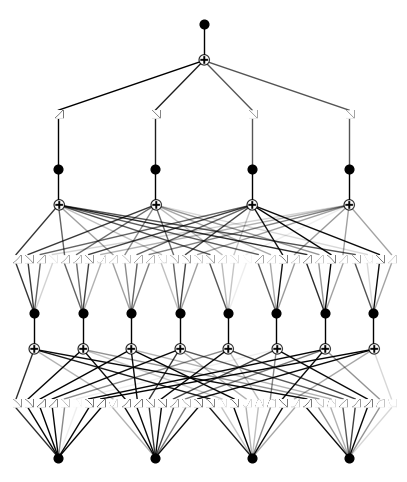

In [7]:
# plot KAN at initialization
model(tensor_data_list[0])
model.plot()

In [8]:
model.fit(dataset, steps=50, lamb=0.001)

| train_loss: 1.48e-01 | test_loss: 2.09e-01 | reg: 7.41e+00 | : 100%|█| 50/50 [01:13<00:00,  1.46s/

saving model version 0.1


{'train_loss': [array(0.18823683),
  array(0.16278977),
  array(0.15813756),
  array(0.15612554),
  array(0.15479959),
  array(0.15578202),
  array(0.15487072),
  array(0.1546608),
  array(0.15411101),
  array(0.1539224),
  array(0.15355275),
  array(0.15257853),
  array(0.15212853),
  array(0.15156647),
  array(0.15082876),
  array(0.15055246),
  array(0.1502508),
  array(0.1500895),
  array(0.14978476),
  array(0.14971191),
  array(0.14979736),
  array(0.14968009),
  array(0.14953621),
  array(0.1494473),
  array(0.14943891),
  array(0.14950613),
  array(0.14941981),
  array(0.14942129),
  array(0.14948123),
  array(0.14948356),
  array(0.14952346),
  array(0.1494687),
  array(0.14941624),
  array(0.14935447),
  array(0.1493232),
  array(0.14933903),
  array(0.14929896),
  array(0.14922482),
  array(0.14914909),
  array(0.14906403),
  array(0.1490571),
  array(0.14892679),
  array(0.1488722),
  array(0.14879936),
  array(0.14867688),
  array(0.14869119),
  array(0.14849464),
  array(

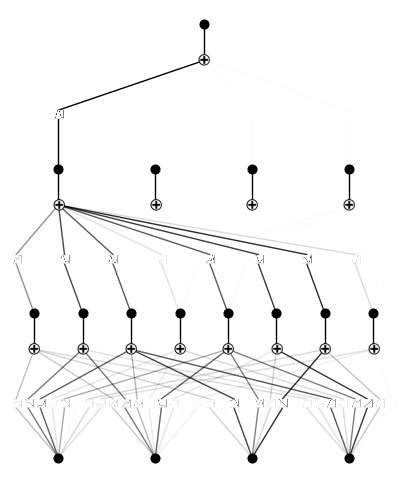

In [34]:
model.plot()

saving model version 0.2


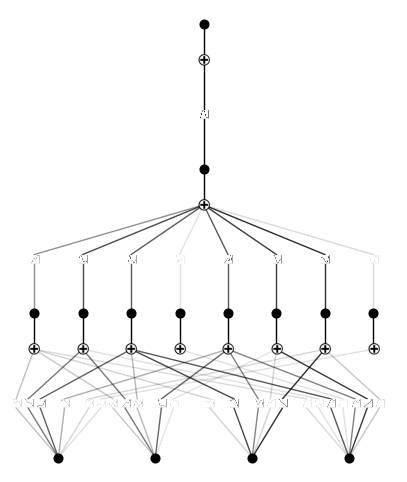

In [9]:
model = model.prune()
model.plot()

In [10]:
model.fit(dataset, steps=50, lamb=0.001)

| train_loss: 1.48e-01 | test_loss: 2.02e-01 | reg: 7.17e+00 | : 100%|█| 50/50 [00:58<00:00,  1.16s/

saving model version 0.3


{'train_loss': [array(0.1568481),
  array(0.15380105),
  array(0.15274565),
  array(0.15169795),
  array(0.15123558),
  array(0.15078136),
  array(0.15023695),
  array(0.15014242),
  array(0.14999697),
  array(0.14994825),
  array(0.15012537),
  array(0.14985202),
  array(0.14993101),
  array(0.14979684),
  array(0.14964605),
  array(0.14969718),
  array(0.14977821),
  array(0.14981109),
  array(0.14971709),
  array(0.14970662),
  array(0.14972771),
  array(0.14967517),
  array(0.14972165),
  array(0.14973416),
  array(0.14963164),
  array(0.14974587),
  array(0.149766),
  array(0.14974614),
  array(0.14968057),
  array(0.14961411),
  array(0.14965871),
  array(0.14961459),
  array(0.14953435),
  array(0.14948495),
  array(0.14949991),
  array(0.14957386),
  array(0.14959077),
  array(0.1494349),
  array(0.14929473),
  array(0.1491755),
  array(0.1492355),
  array(0.14916508),
  array(0.14902164),
  array(0.1487727),
  array(0.14855824),
  array(0.14868755),
  array(0.14863564),
  arra

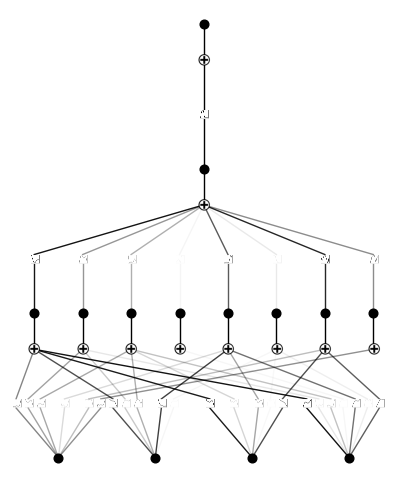

In [11]:
model.plot()

In [20]:
model(dataset['test_input'])

tensor([[0.0813],
        [0.0743],
        [0.1394],
        ...,
        [0.8646],
        [0.8136],
        [0.7363]], grad_fn=<AddBackward0>)

HERE IT STOPS WORKING

saving model version 0.4


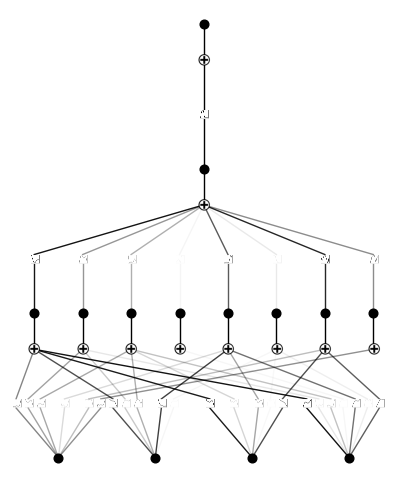

In [21]:
model_pruned = model.prune()
model.plot()

In [35]:
predictions = model_pruned(dataset['test_input'])
predictions

tensor([[0.0573],
        [0.0514],
        [0.1075],
        ...,
        [0.8369],
        [0.7833],
        [0.6986]], grad_fn=<AddBackward0>)

In [2]:
model_pruned

NameError: name 'model_pruned' is not defined

In [36]:
loss_fn = loss_fn_eval = lambda x, y: torch.mean((x - y) ** 2)
loss_fn(predictions, dataset['test_label'])

tensor(0.0402, grad_fn=<MeanBackward0>)

In [37]:
model_pruned.fit(dataset, steps=50, lamb=0.001)

| train_loss: nan | test_loss: nan | reg: nan | : 100%|█████████████| 50/50 [02:16<00:00,  2.74s/it]

saving model version 0.5


{'train_loss': [array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan)],
 'test_loss': [array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  array(nan),
  arra

In [38]:
model_pruned(dataset['test_input'])

tensor([[nan],
        [nan],
        [nan],
        ...,
        [nan],
        [nan],
        [nan]], grad_fn=<AddBackward0>)

In [ ]:
model = model.prune()
model.plot()